In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Pearson: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

## **Obtenção do dataset**

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
type(wine)

sklearn.utils.Bunch

In [5]:
wine.feature_names
# lista os atributos

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target_names
# lista as classificações possíveis

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

*   0: class 0
*   1: class 1
*   2: class 2






In [8]:
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## **Estatísticas de alguns atributos por classe**

Class 0

In [9]:
c0 = wine.loc[wine["class"]==0]
# extraindo representantes da classe 0

In [10]:
c0.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.0
std,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767,0.0
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000,0.0
25%,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000,0.0
50%,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000,0.0
75%,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000,0.0
max,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000,0.0


In [11]:
calcula_estatisticas(c0['alcohol'])

Media: 13.74
Moda: 13.75
Mediana: 13.05
Variância: 0.21
Desvio Padrão: 0.46
Coeficiente Pearson: 0.07
Coeficiente de Kurtosi: -0.6


In [12]:
calcula_estatisticas(c0['total_phenols'])

Media: 2.84
Moda: 2.8
Mediana: 3.0
Variância: 0.11
Desvio Padrão: 0.34
Coeficiente Pearson: 0.8
Coeficiente de Kurtosi: 1.02


In [13]:
calcula_estatisticas(c0['color_intensity'])

Media: 5.53
Moda: 5.4
Mediana: 5.1
Variância: 1.51
Desvio Padrão: 1.23
Coeficiente Pearson: 0.57
Coeficiente de Kurtosi: 0.02


In [14]:
calcula_estatisticas(c0['flavanoids'])

Media: 2.98
Moda: 2.98
Mediana: 2.68
Variância: 0.16
Desvio Padrão: 0.39
Coeficiente Pearson: 0.26
Coeficiente de Kurtosi: -0.57


Class 1

In [15]:
c1 = wine.loc[wine["class"]==1].drop("class", axis=1)
# extraindo representantes da classe 1

In [16]:
c1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [17]:
calcula_estatisticas(c1['alcohol'])

Media: 12.28
Moda: 12.29
Mediana: 12.37
Variância: 0.29
Desvio Padrão: 0.53
Coeficiente Pearson: 0.57
Coeficiente de Kurtosi: 0.61


In [18]:
calcula_estatisticas(c1['total_phenols'])

Media: 2.26
Moda: 2.2
Mediana: 2.2
Variância: 0.29
Desvio Padrão: 0.54
Coeficiente Pearson: 0.35
Coeficiente de Kurtosi: -0.39


In [19]:
calcula_estatisticas(c1['color_intensity'])

Media: 3.09
Moda: 2.9
Mediana: 2.6
Variância: 0.84
Desvio Padrão: 0.92
Coeficiente Pearson: 1.02
Coeficiente de Kurtosi: 1.14


In [20]:
calcula_estatisticas(c1['flavanoids'])

Media: 2.08
Moda: 2.03
Mediana: 2.03
Variância: 0.49
Desvio Padrão: 0.7
Coeficiente Pearson: 1.15
Coeficiente de Kurtosi: 3.33


Class 2

In [21]:
c2 = wine.loc[wine["class"]==2].drop("class", axis=1)
# extraindo representantes da classe 2

In [22]:
c2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


In [23]:
calcula_estatisticas(c2['alcohol'])

Media: 13.15
Moda: 13.16
Mediana: 12.25
Variância: 0.28
Desvio Padrão: 0.52
Coeficiente Pearson: 0.15
Coeficiente de Kurtosi: -0.67


In [24]:
calcula_estatisticas(c2['total_phenols'])

Media: 1.68
Moda: 1.64
Mediana: 1.48
Variância: 0.12
Desvio Padrão: 0.35
Coeficiente Pearson: 0.99
Coeficiente de Kurtosi: 1.3


In [25]:
calcula_estatisticas(c2['color_intensity'])

Media: 7.4
Moda: 7.55
Mediana: 5.0
Variância: 5.23
Desvio Padrão: 2.29
Coeficiente Pearson: 0.29
Coeficiente de Kurtosi: -0.83


In [26]:
calcula_estatisticas(c2['flavanoids'])

Media: 0.78
Moda: 0.68
Mediana: 0.58
Variância: 0.08
Desvio Padrão: 0.29
Coeficiente Pearson: 0.98
Coeficiente de Kurtosi: -0.0


## **Visualizando a distribuição de alguns dos atributos por classe**

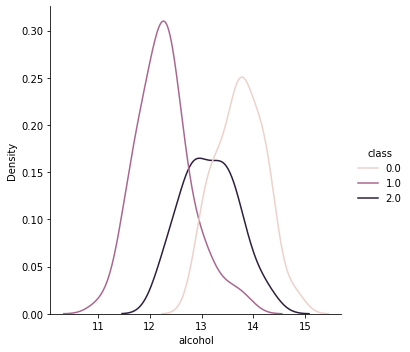

In [27]:
sns.displot(data=wine, x="alcohol", hue="class", kind="kde")

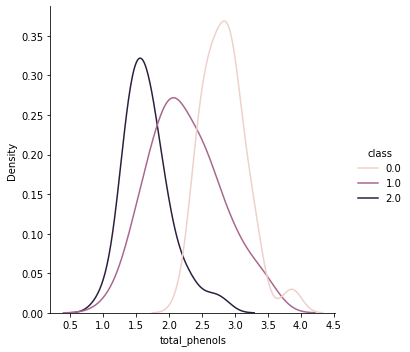

In [28]:
sns.displot(data=wine, x="total_phenols", hue="class", kind="kde")

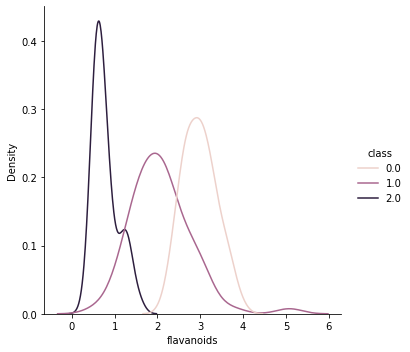

In [29]:
sns.displot(data=wine, x="flavanoids", hue="class", kind="kde")

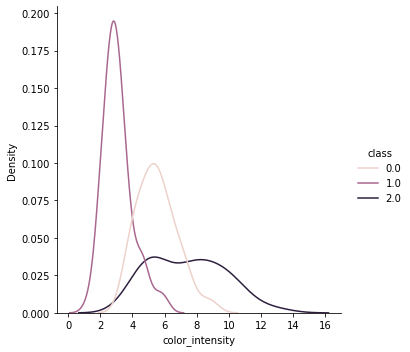

In [30]:
sns.displot(data=wine, x="color_intensity", hue="class", kind="kde")

# **Mais gráficos interessantes**

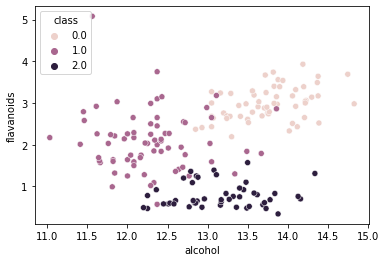

In [31]:
sns.scatterplot(data=wine, x="alcohol", y="flavanoids", hue="class")

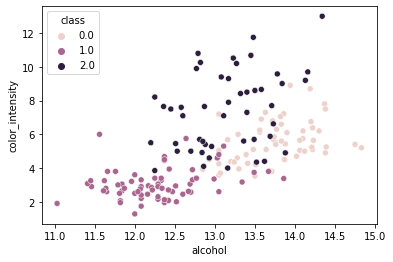

In [32]:
sns.scatterplot(data=wine, x="alcohol", y="color_intensity", hue="class")

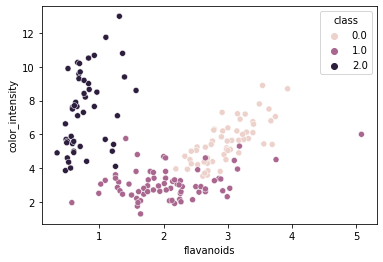

In [33]:
sns.scatterplot(data=wine, x="flavanoids", y="color_intensity", hue="class")

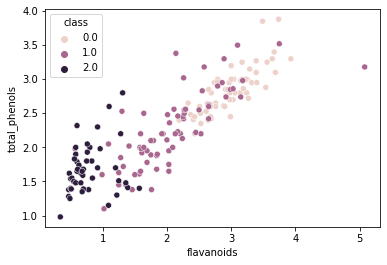

In [34]:
sns.scatterplot(data=wine, x="flavanoids", y="total_phenols", hue="class")

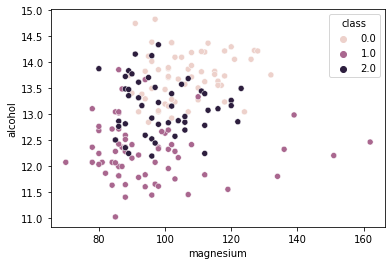

In [35]:
sns.scatterplot(data=wine, x="magnesium", y="alcohol", hue="class")

*   O dataset trabalhado é interessante para modelos de classificação.
*   Analisou-se o comportamento dos atributos para cada classe, isso auxilia na percepção de características que possam viabilizar a tarefa de classificação.